$\textit{Realizado por: Sergio Duque Mejía}$

$\textit{Fecha de entrega: 19/05/2020}$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import pandas as pd
import lmfit

### Modelo S.I.R
El modelo SIR es uno de los modelos epidemiológicos más simples capaces de capturar muchas de las características típicas de los brotes epidémicos. El modelo viene dado por las siguientes ecuaciones diferenciales:


$$ \frac{\mathrm{d} S}{\mathrm{d} t} = -\beta SI $$
$$ \frac{\mathrm{d} I}{\mathrm{d} t} = \beta SI -\gamma I $$
$$ \frac{\mathrm{d} R}{\mathrm{d} t} = \gamma I $$



de las cuales $\textit{S}$ representa la poblacion suceptible, $\textit{I}$ la poblacion infectada y $\textit{R}$ es la poblacion recuperada.
Se presentan dos parametros importantes en este caso $\beta$,$\gamma$ lo cuales representan la tasa de transmision y la tasa de recuperacion.

In [2]:
# sistema de ecuaciones difere1nciales para usar en el metodo de ODEint
def system(Y,t, r,a):
            S,I,R = Y
            dSdt = -r*S*I
            dIdt = r*S*I - a*I
            dRdt = a*I
            return dSdt,dIdt,dRdt

### Parametros y soluciones a tener en cuenta basados en las ecuaciones diferenciales
* S,I,R es una matriz de tamaño: 1 x N 
* s0 : Poblacion inicial
* i0 : infectados iniciales
* r0 : recuperados iniciales
* r : parametro de trasmision, durante el programa se cambia r = aa
* a : parametro de recuperacion, durante el programa se cambia a = bb

### Metodos de solucion a ecuaciones diferenciales:
* $\textbf{Metodo de Euler:}$ procedimiento de integración numérica para resolver ecuaciones diferenciales ordinarias a partir de un valor inicial dado. https://es.wikipedia.org/wiki/M%C3%A9todo_de_Euler, el metodo resuelve:

$$ y_{1} = y_{0} + (x_{1}-x_{0})f(x_{0},y_{0}) = y_{0} + hf(x_{0},y_{0}) $$

* $\textbf{Metodo de Runge-Kutta de 4to orden:}$  los métodos de Runge-Kutta son un conjunto de métodos genéricos iterativos, explícitos e implícitos, de resolución numérica de ecuaciones diferenciales. https://es.wikipedia.org/wiki/M%C3%A9todo_de_Runge-Kutta, el metodo resuelve: 

$$ y_{i+1} = y_{i} + \frac{1}{6}h(k_{1}+k_{2}+k_{3}+k_{4}) $$

$$ \left\{\begin{matrix} k_{1} = f(x_{0},y_{0})\\ k_{2} = f(x_{i}+\frac{1}{2}h, y_{i}+\frac{1}{2}k_{1}h) \\ k_{3} = f(x_{i}+\frac{1}{2}h,y_{i}+\frac{1}{2}k_{2}h) \\ k_{4} =f(x_{i}+h,y_{i}+k_{3}h) \end{matrix}\right. $$

* $\textbf{Metodo Odeint de Scipy:}$ Resuelve numericamente las ecuaciones diferenciales usando Isoda de la libreria libre odepack de FORTRAN  dado un problema de valor inicial. https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html,  https://people.sc.fsu.edu/~jburkardt/f77_src/odepack/odepack.html el metodo resuelve la solucion de y para:

$$ \frac{\mathrm{d} y}{\mathrm{d} t} = f(y,t, parametros) $$

### Clase de evolucion sobre la epidemia

In [3]:
class Epidemia:
    
    def __init__(self, s,i,r):
        self.S = s
        self.I = i
        self.R = r
    
    #  1.1) Funcion de evolucion de la pandemia usando el Metodo de Euler
    def evol_Euler(self, s0,i0,r0,r1,a1):
        a = a1
        r = r1
        self.S[0,0] = s0
        self.I[0,0] = i0
        self.R[0,0] = r0
        
        for i in range(0,len(semanas)-1):
            self.S[0,i+1] = self.S[0,i]-h*(r*self.S[0,i]*self.I[0,i])
            self.I[0,i+1] = self.I[0,i]+h*(r*self.S[0,i]*self.I[0,i]-a*self.I[0,i])
            self.R[0,i+1] = self.R[0,i]+h*(a*self.I[0,i])
            
        return self.S, self.I, self.R
    
    # 1.2) Funcion de evolucion de la pandemia usando el Metodo de RK4 
    def evol_RK4(self, s0,i0,r0,r1,a1):
        a = a1
        r = r1
        self.S[0,0] = s0
        self.I[0,0] = i0
        self.R[0,0] = r0
        
        for i in range(0,len(semanas)-1):
            K1s = -r*self.S[0,i]*self.I[0,i]
            K1i = r*self.S[0,i]*self.I[0,i]-a*self.I[0,i]
            K1r = a*self.I[0,i]
            
            K2s = -r*(self.S[0,i]+h/2*K1s)*(self.I[0,i]+h/2*K1i)
            K2i = r*(self.S[0,i]+h/2*K1s)*(self.I[0,i]+h/2*K1i)-a*(self.I[0,i]+h/2*K1i)
            K2r = a*(self.I[0,i]+h/2*K1i)
            
            K3s = -r*(self.S[0,i]+h/2*K2s)*(self.I[0,i]+h/2*K2i)
            K3i = r*(self.S[0,i]+h/2*K2s)*(self.I[0,i]+h/2*K2i)-a*(self.I[0,i]+h/2*K2i)
            K3r = a*(self.I[0,i]+h/2*K2i)
            
            K4s = -r*(self.S[0,i]+h/2*K3s)*(self.I[0,i]+h/2*K3i)
            K4i = r*(self.S[0,i]+h/2*K3s)*(self.I[0,i]+h/2*K3i)-a*(self.I[0,i]+h/2*K3i)
            K4r = a*(self.I[0,i]+h/2*K3i)
            
            self.S[0,i+1] = self.S[0,i]+h/6*(K1s+2*K2s+2*K3s+K4s)
            self.I[0,i+1] = self.I[0,i]+h/6*(K1i+2*K2i+2*K3i+K4i)
            self.R[0,i+1] = self.R[0,i]+h/6*(K1r+2*K2r+2*K3r+K4r)
            
        return self.S, self.I, self.R
    
    # 1.3) Funcion de evolucion de la pandemia usando el Metodo de ODEint
    def evol_Odeint(self, s0,i0,r0,r1,a1):
        a = a1
        r = r1
        self.S[0,0] = s0
        self.I[0,0] = i0
        self.R[0,0] = r0
        
        y0 = self.S[0,0],self.I[0,0],self.R[0,0]
        integration = odeint(system,y0,semanas, args=(r,a))
        self.S,self.I,self.R = integration.T

        return self.S,self.I,self.R

### Implementacion de la clase:

Poblacion inicial: 762
Numero inicial de infectados: 1
Valor del parametro 'Tasa de infeccion': 0.00218
Valor del parametro 'Tasa de recuperacion': 0.44036
Semanas en que se evalua la poblacion: 15


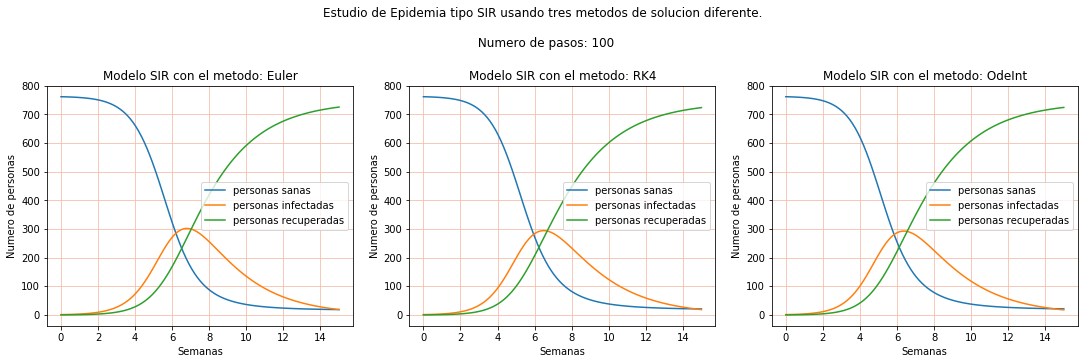

In [5]:
#parametros:
s0 = float(input("Poblacion inicial: "))
i0 = float(input("Numero inicial de infectados: "))
aa = float(input("Valor del parametro 'Tasa de infeccion': "))
bb = float(input("Valor del parametro 'Tasa de recuperacion': "))
t = float(input("Semanas en que se evalua la poblacion: "))

""" Se implementa el procedimiento dado en clase para variar los pasos de las soluciones
    Como se observa para realizar los datos sin usar el bucle que corre en el indice de "puntos"
    se especifica el h en la linea 21.
"""

puntos = np.array([11,101,1001,10001])
hh = t/puntos # pasos
h = hh[1]
semanas = np.linspace(0,t,puntos[1])

# Evolucion de la epidemia, para comparar los datos de las soluciones:
E = Epidemia(np.zeros([1,len(semanas)]),np.zeros([1,len(semanas)]),np.zeros([1,len(semanas)]))
Eeuler_s = E.evol_Euler(s0,i0,0,aa,bb)[0][0]
Eeuler_i = E.evol_Euler(s0,i0,0,aa,bb)[1][0]
Eeuler_r = E.evol_Euler(s0,i0,0,aa,bb)[2][0]
Eeuler = np.array([Eeuler_s,Eeuler_i,Eeuler_r])

Erk4_s = E.evol_RK4(s0,i0,0,aa,bb)[0][0]
Erk4_i = E.evol_RK4(s0,i0,0,aa,bb)[1][0]
Erk4_r = E.evol_RK4(s0,i0,0,aa,bb)[2][0]
Erk4 = np.array([Erk4_s,Erk4_i,Erk4_r])

Eodeint = E.evol_Odeint(s0,i0,0,aa,bb)
Eode = np.array([Eodeint[0],Eodeint[1],Eodeint[2]])

soluciones = []
soluciones.append(Eeuler)
soluciones.append(Erk4)
soluciones.append(Eode)

title = np.array(["Euler","RK4","OdeInt"])
solved = np.array(["S","I","R"])
label = np.array(["personas sanas","personas infectadas","personas recuperadas"])

d,o = plt.subplots(1,3 , figsize=(15, 5), constrained_layout=True)
for i in range(3):
    for j in range(3):
        o[i].grid(color="#F5BCA9")
        o[i].plot(semanas,soluciones[i][j], label=label[j])
        o[i].legend()
        o[i].set_title('Modelo SIR con el metodo: '+title[i])
        o[i].set_xlabel("Semanas")
        o[i].set_ylabel("Numero de personas")
        
plt.suptitle("Estudio de Epidemia tipo SIR usando tres metodos de solucion diferente. \n\n Numero de pasos: "+str(len(semanas)-1)+"\n")
plt.show()


### Comparacion de los resultado de cada solución encontrada:

In [6]:
puntos_index = np.array([0,3])
Data = []
semana_T = []
for i in puntos_index:
    h = hh[i]
    semanas = np.linspace(0,t,puntos[i])

    E = Epidemia(np.zeros([1,len(semanas)]),np.zeros([1,len(semanas)]),np.zeros([1,len(semanas)]))
    Eeuler_s = E.evol_Euler(s0,i0,0,aa,bb)[0][0]
    Eeuler_i = E.evol_Euler(s0,i0,0,aa,bb)[1][0]
    Eeuler_r = E.evol_Euler(s0,i0,0,aa,bb)[2][0]
    Eeuler = np.array([Eeuler_s,Eeuler_i,Eeuler_r])


    Erk4_s = E.evol_RK4(s0,i0,0,aa,bb)[0][0]
    Erk4_i = E.evol_RK4(s0,i0,0,aa,bb)[1][0]
    Erk4_r = E.evol_RK4(s0,i0,0,aa,bb)[2][0]
    Erk4 = np.array([Erk4_s,Erk4_i,Erk4_r])

    Eodeint = E.evol_Odeint(s0,i0,0,aa,bb)
    Eode = np.array([Eodeint[0],Eodeint[1],Eodeint[2]])
    
    Data.append(Eeuler)
    Data.append(Erk4)
    Data.append(Eode)
    semana_T.append(semanas)

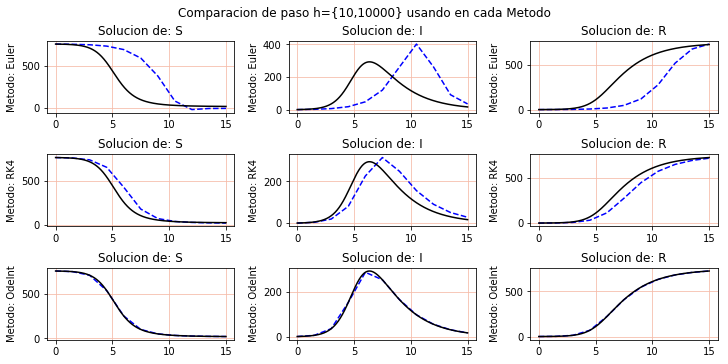

In [7]:
f, a = plt.subplots(3, 3, figsize=(10, 5), constrained_layout=True)
Data_index = np.array([[0,3],[1,4],[2,5]])
for i in range(3):
    for j in range(3):
        a[j,i].grid(color="#F5BCA9")
        a[j,i].set_title('Solucion de: '+solved[i])
        a[j,i].set_ylabel("Metodo: "+title[j])
        a[j,i].plot(semana_T[0],Data[Data_index[j][0]][i],"--",color="b")
        a[j,i].plot(semana_T[1],Data[Data_index[j][1]][i],color="black")


plt.suptitle("Comparacion de paso h={10,10000} usando en cada Metodo")
plt.show()

### Superposicion de las soluciones de cada metodo usando h = 10000

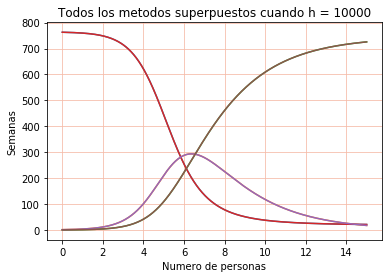

In [8]:
#Solucion conjunta usando h = 10000:
for k in range(3,5):
    for m in range(3):
        plt.plot(semana_T[1],Data[k][m])
plt.title("Todos los metodos superpuestos cuando h = 10000")
plt.grid(color="#F5BCA9")
plt.xlabel("Numero de personas")
plt.ylabel("Semanas")
plt.show()

### Convergencia de las soluciones 

In [9]:
# Diferencia entre las soluciones del Metodo Euler - RK4
y1_difs = [] # S
y1_difi = [] # I
y1_difr = [] # R

# Diferencia entre las soluciones del Metodo Euler - ODEint
y2_difs = [] # S
y2_difi = [] # I
y2_difr = [] # R

# DIferencia entre las soluciones del Metodo RK4 - ODEint
y3_difs = [] # S
y3_difi = [] # I
y3_difr = [] # R

In [10]:
t = 15 # Numero final de semanas
hh = t/puntos # pasos

for i in range(0,4):
    h = hh[i]
    semanas = np.linspace(0,t,puntos[i])

    E = Epidemia(np.zeros([1,len(semanas)]),np.zeros([1,len(semanas)]),np.zeros([1,len(semanas)]))
    Eeuler_s = E.evol_Euler(s0,i0,0,aa,bb)[0][0]
    Eeuler_i = E.evol_Euler(s0,i0,0,aa,bb)[1][0]
    Eeuler_r = E.evol_Euler(s0,i0,0,aa,bb)[2][0]

    Erk4_s = E.evol_RK4(s0,i0,0,aa,bb)[0][0]
    Erk4_i = E.evol_RK4(s0,i0,0,aa,bb)[1][0]
    Erk4_r = E.evol_RK4(s0,i0,0,aa,bb)[2][0]
    
    Eodeint = E.evol_Odeint(s0,i0,0,aa,bb)

    y1_difs.append(np.mean(np.abs(Erk4_s - Eeuler_s[0])))
    y1_difi.append(np.mean(np.abs(Erk4_i - Eeuler_i[1])))
    y1_difr.append(np.mean(np.abs(Erk4_r - Eeuler_r[2])))
    
    y2_difs.append(np.mean(np.abs(Eeuler_s - Eodeint[0])))
    y2_difi.append(np.mean(np.abs(Eeuler_i - Eodeint[1])))
    y2_difr.append(np.mean(np.abs(Eeuler_r - Eodeint[2])))
    
    y3_difs.append(np.mean(np.abs(Erk4_s - Eodeint[0])))
    y3_difi.append(np.mean(np.abs(Erk4_i - Eodeint[1])))
    y3_difr.append(np.mean(np.abs(Erk4_r - Eodeint[2])))

In [11]:
y1_dif = [y1_difs,y1_difi,y1_difr]
y2_dif = [y2_difs,y2_difi,y2_difr]
y3_dif = [y3_difs,y3_difi,y3_difr]
y_dif = y1_dif + y2_dif + y3_dif

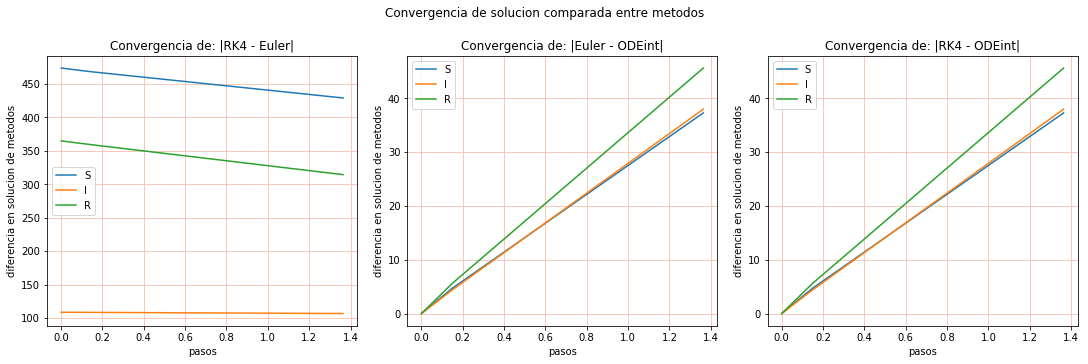

In [12]:
y_dif_index = np.array([[0,1,2],[3,4,5],[6,7,8]])
dif = np.array(["|RK4 - Euler|","|Euler - ODEint|","|RK4 - ODEint|"])
g,p = plt.subplots(1,3 , figsize=(15, 5), constrained_layout=True)
for i in range(3):
    for j in range(3):
        p[i].grid(color="#F5BCA9")
        p[i].set_title('Convergencia de: '+dif[i])
        p[i].set_xlabel("pasos")
        p[i].set_ylabel("diferencia en solucion de metodos")
        p[i].plot(hh,y_dif[y_dif_index[i][j]], label=solved[j])
        p[i].legend()

plt.suptitle("Convergencia de solucion comparada entre metodos\n")
plt.show()

### Estudio de la dependencia de curva de infectados y recuperados con respecto a los parámetros libres del sistema.

Semanas en que se evalua la poblacion: 50
Se compara respecto a los parametros: a= 0.00218  b= 0.44036
Valor del parametro 'Tasa de infeccion': 0.00218
Valor del parametro 'Tasa de recuperacion': 0.44036
Valor del parametro 'Tasa de infeccion': 0.008
Valor del parametro 'Tasa de recuperacion': 0.44036
Valor del parametro 'Tasa de infeccion': 0.00218
Valor del parametro 'Tasa de recuperacion': 0.6
Valor del parametro 'Tasa de infeccion': 0.00102
Valor del parametro 'Tasa de recuperacion': 0.44036
Valor del parametro 'Tasa de infeccion': 0.00218
Valor del parametro 'Tasa de recuperacion': 0.2
Valor del parametro 'Tasa de infeccion': 0.008
Valor del parametro 'Tasa de recuperacion': 0.6
Valor del parametro 'Tasa de infeccion': 0.00102
Valor del parametro 'Tasa de recuperacion': 0.2
Valor del parametro 'Tasa de infeccion': 0.008
Valor del parametro 'Tasa de recuperacion': 0.2
Valor del parametro 'Tasa de infeccion': 0.00102
Valor del parametro 'Tasa de recuperacion': 0.6


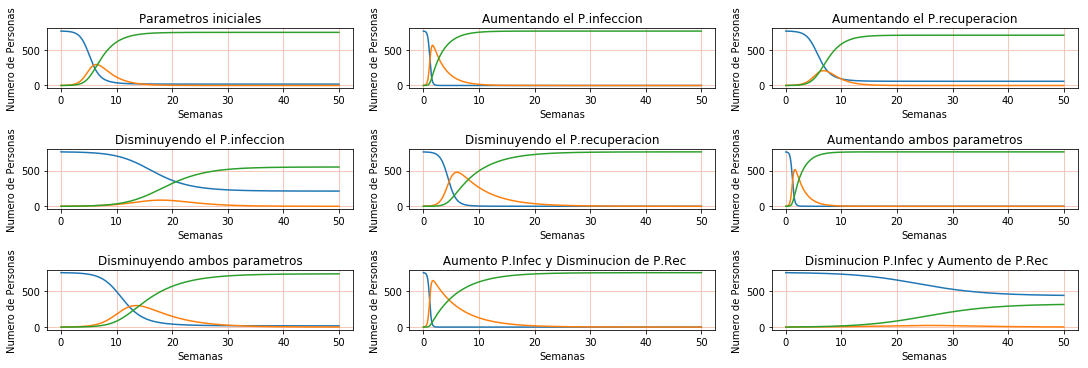

In [14]:
a_c = 0.00218 # Tasa de infeccion
b_c = 0.44036 # Tasa de recuperacion
t = float(input("Semanas en que se evalua la poblacion: "))
max_min = np.array(["maximo de infeccion ", "finalizacion de infeccion "])
print("Se compara respecto a los parametros: a=",a_c," b=",b_c)

q,u = plt.subplots(3,3 , figsize=(15, 5), constrained_layout=True)
for i in range(3): 
    for k in range(3):
        aa = float(input("Valor del parametro 'Tasa de infeccion': "))
        bb = float(input("Valor del parametro 'Tasa de recuperacion': "))
        
        hh = t/puntos
        h = hh[3]
        semanas = np.linspace(0,t,puntos[3])

        E = Epidemia(np.zeros([1,len(semanas)]),np.zeros([1,len(semanas)]),np.zeros([1,len(semanas)]))
        Eodeint = E.evol_Odeint(s0,i0,0,aa,bb)
        Eode = np.array([Eodeint[0],Eodeint[1],Eodeint[2]])
        

        for j in range(3):
            if (aa == a_c and bb == b_c):
                u[i,k].grid(color="#F5BCA9")
                u[i,k].set_xlabel("Semanas")
                u[i,k].set_ylabel("Numero de Personas")
                u[i,k].set_title("Parametros iniciales")
                u[i,k].plot(semanas, Eode[j])
            elif (aa > a_c and bb == b_c):
                u[i,k].grid(color="#F5BCA9")
                u[i,k].set_xlabel("Semanas")
                u[i,k].set_ylabel("Numero de Personas")
                u[i,k].set_title("Aumentando el P.infeccion")
                u[i,k].plot(semanas, Eode[j])
            elif (bb > b_c and aa == a_c):
                u[i,k].grid(color="#F5BCA9")
                u[i,k].set_xlabel("Semanas")
                u[i,k].set_ylabel("Numero de Personas")
                u[i,k].set_title("Aumentando el P.recuperacion")
                u[i,k].plot(semanas, Eode[j])
            elif (aa < a_c and bb == b_c):
                u[i,k].grid(color="#F5BCA9")
                u[i,k].set_xlabel("Semanas")
                u[i,k].set_ylabel("Numero de Personas")
                u[i,k].set_title("Disminuyendo el P.infeccion")
                u[i,k].plot(semanas, Eode[j])
            elif (bb < b_c and aa == a_c):
                u[i,k].grid(color="#F5BCA9")
                u[i,k].set_xlabel("Semanas")
                u[i,k].set_ylabel("Numero de Personas")
                u[i,k].set_title("Disminuyendo el P.recuperacion")
                u[i,k].plot(semanas, Eode[j])
            elif (aa > a_c and bb > b_c):
                u[i,k].grid(color="#F5BCA9")
                u[i,k].set_xlabel("Semanas")
                u[i,k].set_ylabel("Numero de Personas")
                u[i,k].set_title("Aumentando ambos parametros")
                u[i,k].plot(semanas, Eode[j])
            elif (bb < b_c and aa < a_c):
                u[i,k].grid(color="#F5BCA9")
                u[i,k].set_xlabel("Semanas")
                u[i,k].set_ylabel("Numero de Personas")
                u[i,k].set_title("Disminuyendo ambos parametros")
                u[i,k].plot(semanas, Eode[j])
            elif (aa > a_c and bb < b_c):
                u[i,k].grid(color="#F5BCA9")
                u[i,k].set_xlabel("Semanas")
                u[i,k].set_ylabel("Numero de Personas")
                u[i,k].set_title(" Aumento P.Infec y Disminucion de P.Rec")
                u[i,k].plot(semanas, Eode[j])
            elif (aa < a_c and bb > b_c):
                u[i,k].grid(color="#F5BCA9")
                u[i,k].set_xlabel("Semanas")
                u[i,k].set_ylabel("Numero de Personas")
                u[i,k].set_title(" Disminucion P.Infec y Aumento de P.Rec")
                u[i,k].plot(semanas, Eode[j])

### Comparacion de datos obtenidos en wuhan hasta la fecha con respecto a el modelo S.I.R expuesto anteriormente.

Los datos fueron extraidos de la base de datos que se actualiza cada dia: https://github.com/CSSEGISandData/COVID-19.

In [4]:
data_recovered = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv")
data_infected = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")

In [16]:
data_infected.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,3778,4033,4402,4687,4963,5226,5639,6053,6402,6664
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,850,856,868,872,876,880,898,916,933,946
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,5369,5558,5723,5891,6067,6253,6442,6629,6821,7019
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,752,754,755,755,758,760,761,761,761,761
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,43,43,45,45,45,45,48,48,48,48


In [5]:
hubei_recovered = data_recovered[data_recovered["Province/State"] == "Hubei"]
hubei_infected = data_infected[data_infected["Province/State"] == "Hubei"]

In [6]:
index = hubei_recovered.columns.values[4:]

In [7]:
HI_col = []
HR_col = []
infected = []
timeline = np.arange(1,len(index)-1)
for i in index:
    datax = int(hubei_infected[i])
    datay = int(hubei_recovered[i])
    HI_col.append(datax)
    HR_col.append(datay)

In [8]:
for j in range(len(index)):
    dat_I = HI_col[j] - HR_col[j]
    infected.append(dat_I)

In [9]:
def infec_ode(semanas,aa,bb):
    E = Epidemia(np.zeros([1,len(semanas)]),np.zeros([1,len(semanas)]),np.zeros([1,len(semanas)]))
    a = E.evol_Odeint(s0,i0,0,aa,bb)[1]
    return a 

def recov_ode(semanas,aa,bb):
    E = Epidemia(np.zeros([1,len(semanas)]),np.zeros([1,len(semanas)]),np.zeros([1,len(semanas)]))
    a = E.evol_Odeint(s0,i0,0,aa,bb)[2]
    return a 

def initial_ode(semanas,aa,bb):
    E = Epidemia(np.zeros([1,len(semanas)]),np.zeros([1,len(semanas)]),np.zeros([1,len(semanas)]))
    a = E.evol_Odeint(s0,i0,0,aa,bb)[0]
    return a 

In [15]:
def chisquar(data_obs,eq_fit):
    solv_fit = np.sum(np.abs(((data_obs - eq_fit)**2) / data_obs))
    return solv_fit

def minimo_chisquare(t,a,b,eq_fit,data_obs):
    for i in a:
        for j in b:
            if i == a[0]:
                acumul = chisquar(data_obs[:-17],eq_fit(t,i,j))
                parameters = [i,j]
            else:
                if acumul > chisquar(data_obs[:-17],eq_fit(t,i,j)):
                    acumul = chisquar(data_obs[:-17],eq_fit(t,i,j))
                    parameters = [i,j]
    return acumul , parameters

In [16]:
aa = np.linspace(1e-5,8e-7,150)
bb = np.linspace(0.003,0.05,150)
t = len(index)
hh = t/puntos
h = hh[1]
semanas = np.linspace(0,t,puntos[1])
s0 = max(HR_col)
i0 = min(infected)

minin,dat_x = minimo_chisquare(semanas,aa,bb,infec_ode,infected)

In [17]:
dat_x

[4.381208053691276e-06, 0.03643624161073826]

[4.381208053691276e-06, 0.03643624161073826]


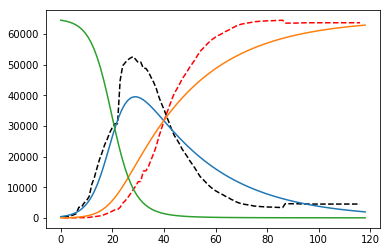

In [18]:
print(dat_x)
plt.plot(timeline,infected[:-2], "--",color="black")
plt.plot(timeline, HR_col[:-2], "--",color="red")
plt.plot(semanas, infec_ode(semanas, *dat_x))
plt.plot(semanas, recov_ode(semanas, *dat_x))
plt.plot(semanas, initial_ode(semanas, *dat_x))

In [30]:
for i in range(len(semanas)):
    if (infec_ode(semanas,*dat_x)[i] == max(infec_ode(semanas,*dat_x))):
        print("Semana en que ocurre el pico maximo de infeccion segun el ajuste: ",i)

Semana en que ocurre el pico maximo de infeccion segun el ajuste:  24


### Aumentando la poblacion inicial y usando el metodo lmfit para realizar el ajuste.
pagina de referencia al paquete: https://lmfit.github.io/lmfit-py/ 

In [41]:
s0 = 58e6
mod = lmfit.Model(infec_ode)
mod.set_param_hint("aa", value=5e-9,vary=True)
mod.set_param_hint("bb", value=3,vary=True)
params = mod.make_params()

In [42]:
result = mod.fit(infected[:-17], params, method="leastsq",semanas=semanas)
result.best_values

{'aa': 6.698619261883705e-08, 'bb': 3.710820060753309}

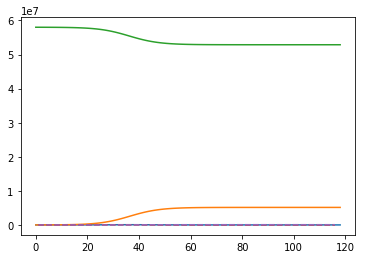

In [48]:
N_params = np.array([6.698619261883705e-08,3.710820060753309])
plt.plot(semanas,infec_ode(semanas, *N_params))
plt.plot(semanas,recov_ode(semanas, *N_params))
plt.plot(semanas,initial_ode(semanas, *N_params))
plt.plot(timeline,infected[:-2],"--")
plt.plot(timeline,HR_col[:-2],"--")